# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [5]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

<ipython-input-5-21768eb40cee>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [ ]:
from sklearn.svm import SVR #Regression
from sklearn.svm import SVC #Classifier

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [ ]:
from sklearn import datasets
X, y = datasets.fetch_openml('boston', return_X_y=True)

model = make_pipeline(MinMaxScaler(), SVR())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2023)
model.fit(X_train, y_train)

print('학습데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가데이터 점수 : {}'.format(model.score(X_test, y_test)))

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


학습데이터 점수 : 0.6064396376853101
평가데이터 점수 : 0.5765499247704151


### SVM을 사용한 분류 모델 (SVC)

In [ ]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target,
                                                    test_size = 0.2, random_state = 2023)
model = make_pipeline(StandardScaler(), SVC())
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9824175824175824
평가 데이터 점수: 0.9736842105263158


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원
  + kernel defualt = "rbf"

In [ ]:
from sklearn import datasets
X, y = datasets.fetch_openml('boston', return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2023)
kernel = ['linear', 'poly', 'rbf']

for k in kernel:
  model = make_pipeline(StandardScaler(), SVR(kernel = k))
  model.fit(X_train, y_train)
  print(k + ' 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
  print(k + ' 평가 데이터 점수: {}\n'.format(model.score(X_test, y_test)))

linear 학습 데이터 점수: 0.6850602650159334
linear 평가 데이터 점수: 0.7294763281467305



/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


poly 학습 데이터 점수: 0.6715785111699004
poly 평가 데이터 점수: 0.6624349547975328

rbf 학습 데이터 점수: 0.6622367413510791
rbf 평가 데이터 점수: 0.6335922642235423



In [ ]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2023)
kernel = ['linear', 'poly', 'rbf']

for k in kernel:
  model = make_pipeline(StandardScaler(), SVC(kernel = k))
  model.fit(X_train, y_train)
  print(k + ' 학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
  print(k + ' 평가 데이터 점수: {}\n'.format(model.score(X_test, y_test)))

linear 학습 데이터 점수: 0.9859154929577465
linear 평가 데이터 점수: 0.958041958041958

poly 학습 데이터 점수: 0.9107981220657277
poly 평가 데이터 점수: 0.8951048951048951

rbf 학습 데이터 점수: 0.9812206572769953
rbf 평가 데이터 점수: 0.965034965034965



## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰
 + degree
    + default = 3 
    + polynomial kernel 에서 사용, 다른 kernel 에서는 무시
 + gamma 
    + default = scale, 1 / (n_features * X.var()
    + kernel for poly, rbf, sigmoid 
    + 값이 클 수록 결정 경계의 곡률이 증가(과대적합), 값이 작으면
    결정경계의 곡률이 감소(과소적합)
  + C
    + default = 1.0
    + c값을 낮게 줄 수록 오류를 많이 허용, c가 높으면 과적합이 
    될 수  있고 c가 작으면 과소적합이 될 수 있다.
 + epsilon(SVR)
    + default = 0.1
    + epsilon tube의 너비 조절 
    + epslion tube안의 loss는 고려하지 않는다 즉 tube 너비가 
    넓을수록 더 많은 오류를 허용한다

In [ ]:
from sklearn.datasets import load_breast_cancer

X,y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target,
                                                    test_size = 0.2, random_state = 123)

model = make_pipeline(StandardScaler(), SVC(kernel = 'poly',
                                            degree = 2,
                                            C = 1.5, 
                                            gamma = 'scale'))
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.8593406593406593
평가 데이터 점수: 0.8157894736842105


## 데이터 스케일링 중요성

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
  + outlier에 영향을 많이 받는다
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [ ]:
from sklearn.datasets import load_breast_cancer

X,y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target,
                                                    test_size = 0.2, random_state = 123)

In [ ]:
model = SVC()
model.fit(X_train, y_train)
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9032967032967033
평가 데이터 점수: 0.9298245614035088


In [ ]:
model = make_pipeline(StandardScaler(), SVC())
model.fit(X_train, y_train)
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9868131868131869
평가 데이터 점수: 0.9824561403508771


## SVR example

### 보스턴 주택 가격

최적 커널 확인

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.fetch_openml('boston', return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

In [ ]:
# SVR 파라미터 확인

make_pipeline(SVR()).get_params().items()

dict_items([('memory', None), ('steps', [('svr', SVR())]), ('verbose', False), ('svr', SVR()), ('svr__C', 1.0), ('svr__cache_size', 200), ('svr__coef0', 0.0), ('svr__degree', 3), ('svr__epsilon', 0.1), ('svr__gamma', 'scale'), ('svr__kernel', 'rbf'), ('svr__max_iter', -1), ('svr__shrinking', True), ('svr__tol', 0.001), ('svr__verbose', False)])

최적 커널 탐색

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as ms

model = make_pipeline(StandardScaler(), SVR())

param_dict = {'svr__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}

gs = GridSearchCV(model, param_grid = param_dict, 
                  cv = ms.KFold(shuffle = True, random_state = 2023))
gs.fit(X_train, y_train)

print('최적 커널 : {}'.format(gs.best_estimator_))
print('최종 테스트 점수 : {}'.format(gs.score(X_test, y_test)))
res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 'param_svr__kernel']]

최적 커널 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(kernel='linear'))])
최종 테스트 점수 : 0.7413868926050953


,rank_test_score,mean_test_score,param_svr__kernel
0,1,0.683205,linear
2,2,0.627858,rbf
3,3,0.564997,sigmoid
1,4,0.556130,poly


```kernel = 'linear'```

In [ ]:
# linear kernel 일때는 감마 사용 x

model = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

param_dict = {'svr__C' : [0.01, 0.1, 1, 10, 100],
              'svr__epsilon' : [1.0, 0.1, 0.01]}


gs = GridSearchCV(model, param_grid = param_dict,
                  cv = ms.KFold(shuffle = True, random_state = 2023), 
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)

print('최적 파라미터 : {}\n'.format(gs.best_estimator_))
res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
print('최종 테스트 점수 : {}\n'.format(gs.score(X_test, y_test)))
res[['rank_test_score', 'mean_test_score', 'param_svr__C','param_svr__epsilon']].head(10)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
최적 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=10, epsilon=0.01, kernel='linear'))])

최종 테스트 점수 : 0.7445335059311051



,rank_test_score,mean_test_score,param_svr__C,param_svr__epsilon
11,1,0.683952,10,0.01
14,2,0.683945,100,0.01
7,3,0.683205,1,0.1
13,4,0.683071,100,0.1
10,5,0.682961,10,0.1
8,6,0.681924,1,0.01
9,7,0.679333,10,1.0
12,8,0.679153,100,1.0
6,9,0.676508,1,1.0
3,10,0.673787,0.1,1.0


Fitting 5 folds for each of 15 candidates, totalling 75 fits


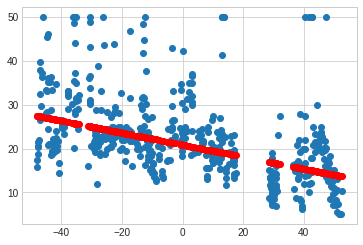

In [ ]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)
gs.fit(X_comp, y)
predict = gs.predict(X_comp)
plt.scatter(X_comp, predict, color = 'r')

```kernel = 'poly'```



In [ ]:
# degree값 조절가능(2차이상 공간에 매핑)
# kernel 이 poly일때는 gamma값은 default로 주는게 좋은거 같다

model = make_pipeline(StandardScaler(), SVR(kernel = 'poly'))

param_dict = {'svr__C' : [1, 10, 100],
              'svr__epsilon' : [1.0, 0.1, 0.01],
              'svr__degree' : [2,3,4],
              'svr__gamma' : ['auto', 'scale']}


gs = GridSearchCV(model, param_grid = param_dict,
                  cv = ms.KFold(shuffle = True, random_state = 2023), 
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)

print('최적의 파라미터 : {}\n'.format(gs.best_estimator_))
print('최종 테스트 점수 : {}\n'.format(gs.score(X_test, y_test)))
res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 
     'param_svr__degree', 'param_svr__C', 
     'param_svr__epsilon', 'param_svr__gamma']].head(10)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
최적의 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, epsilon=1.0, gamma='auto', kernel='poly'))])

최종 테스트 점수 : 0.8599125280412598



,rank_test_score,mean_test_score,param_svr__degree,param_svr__C,param_svr__epsilon,param_svr__gamma
43,1,0.674777,3,100,1.0,scale
42,1,0.674777,3,100,1.0,auto
25,3,0.633283,3,10,1.0,scale
24,3,0.633283,3,10,1.0,auto
29,5,0.625585,3,10,0.01,scale
28,5,0.625585,3,10,0.01,auto
26,7,0.625559,3,10,0.1,auto
27,7,0.625559,3,10,0.1,scale
31,9,0.606380,4,10,1.0,scale
30,9,0.606380,4,10,1.0,auto


Fitting 5 folds for each of 54 candidates, totalling 270 fits


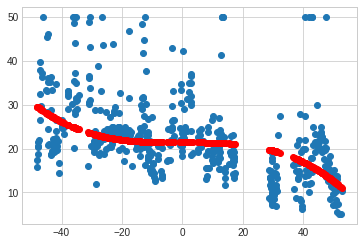

In [ ]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)
gs.fit(X_comp, y)
predict = gs.predict(X_comp)
plt.scatter(X_comp, predict, color = 'r')

```kernel = 'rbf' ```

In [ ]:
model = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

param_dict = {'svr__C' : [1, 10, 100],
              'svr__epsilon' : [1.0, 0.1, 0.01],
              'svr__gamma' : ['auto', 'scale']}

             

gs = GridSearchCV(model, param_grid = param_dict,
                  cv = ms.KFold(shuffle = True, random_state = 2023), 
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)

print('최종 테스트 점수 : {}\n'.format(gs.score(X_test, y_test)))
print('최적 파라미터 : {}'.format(gs.best_estimator_))

res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 'param_svr__C',
     'param_svr__epsilon', 'param_svr__gamma']].head(10)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
최종 테스트 점수 : 0.918181955013794

최적 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, epsilon=1.0, gamma='auto'))])


,rank_test_score,mean_test_score,param_svr__C,param_svr__epsilon,param_svr__gamma
13,1,0.854857,100,1.0,scale
12,1,0.854857,100,1.0,auto
15,3,0.847370,100,0.1,scale
14,3,0.847370,100,0.1,auto
17,5,0.846031,100,0.01,scale
16,5,0.846031,100,0.01,auto
6,7,0.802672,10,1.0,auto
7,7,0.802672,10,1.0,scale
11,9,0.799454,10,0.01,scale
10,9,0.799454,10,0.01,auto


Fitting 5 folds for each of 54 candidates, totalling 270 fits


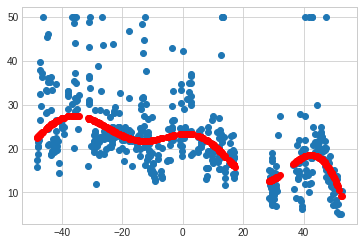

In [ ]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)
gs.fit(X_comp, y)
predict = gs.predict(X_comp)
plt.scatter(X_comp, predict, color = 'r')

```kernel = 'sigmoid'```

In [ ]:
model = make_pipeline(StandardScaler(), SVR(kernel = 'sigmoid'))

param_dict = {'svr__C' : [0.01,0.1,1, 10, 100],
              'svr__epsilon' : [1.0, 0.1, 0.01],
              'svr__gamma' : [0.01,'auto', 'scale']}

             

gs = GridSearchCV(model, param_grid = param_dict,
                  cv = ms.KFold(shuffle = True, random_state = 2023), 
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)

print('최종 테스트 점수 : {}\n'.format(gs.score(X_test, y_test)))
print('최적 파라미터 : {}'.format(gs.best_estimator_))

res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 'param_svr__C',
     'param_svr__epsilon', 'param_svr__gamma']].head(10)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
최종 테스트 점수 : 0.7127189503763776

최적 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=10, epsilon=1.0, gamma=0.01, kernel='sigmoid'))])


,rank_test_score,mean_test_score,param_svr__C,param_svr__epsilon,param_svr__gamma
27,1,0.671301,10,1.0,0.01
30,2,0.666154,10,0.1,0.01
33,3,0.665790,10,0.01,0.01
39,4,0.657265,100,0.1,0.01
42,5,0.654291,100,0.01,0.01
36,6,0.654176,100,1.0,0.01
20,7,0.577475,1,1.0,scale
19,7,0.577475,1,1.0,auto
23,9,0.564997,1,0.1,scale
22,9,0.564997,1,0.1,auto


Fitting 5 folds for each of 45 candidates, totalling 225 fits


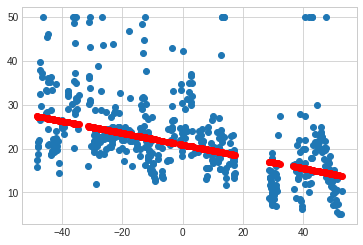

In [ ]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)
gs.fit(X_comp, y)
predict = gs.predict(X_comp)
plt.scatter(X_comp, predict, color = 'r')

### 당뇨병

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 2023)

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline


make_pipeline(SVR()).get_params().items()

dict_items([('memory', None), ('steps', [('svr', SVR())]), ('verbose', False), ('svr', SVR()), ('svr__C', 1.0), ('svr__cache_size', 200), ('svr__coef0', 0.0), ('svr__degree', 3), ('svr__epsilon', 0.1), ('svr__gamma', 'scale'), ('svr__kernel', 'rbf'), ('svr__max_iter', -1), ('svr__shrinking', True), ('svr__tol', 0.001), ('svr__verbose', False)])

최적 커널 탐색

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV
import pandas as pd


model = make_pipeline(StandardScaler(), SVR())

param_dict = {'svr__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}

gs = GridSearchCV(model, param_grid = param_dict, cv = ms.KFold(shuffle = True,
                                                                random_state = 2023))
gs.fit(X_train, y_train)
print('최적의 파라미터 : {}\n'.format(gs.best_estimator_))
print('최종 테스트 점수 : {}\n'.format(gs.score(X_test, y_test)))
res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 'param_svr__kernel']].head(10)

최적의 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(kernel='linear'))])

최종 테스트 점수 : 0.49651747119539325



,rank_test_score,mean_test_score,param_svr__kernel
0,1,0.431744,linear
3,2,0.276783,sigmoid
1,3,0.147767,poly
2,4,0.076995,rbf


``` kernel = 'linear'```

In [ ]:
import multiprocessing

model = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2023)

param_dict = {'svr__C' : [0.01, 0.1, 1, 10, 100],
              'svr__epsilon' : [1.0, 0.1, 0.01]}


gs = GridSearchCV(model, param_grid = param_dict,
                  cv = ms.KFold(shuffle = True, random_state = 2023), 
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)

print('최적 파라미터 : {}\n'.format(gs.best_estimator_))
res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
print('최종 테스트 점수 : {}\n'.format(gs.score(X_test, y_test)))
res[['rank_test_score', 'mean_test_score', 'param_svr__C','param_svr__epsilon']].head(10)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
최적 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, epsilon=1.0, kernel='linear'))])

최종 테스트 점수 : 0.49843651859714966



,rank_test_score,mean_test_score,param_svr__C,param_svr__epsilon
6,1,0.432278,1,1.0
7,2,0.431744,1,0.1
8,3,0.431729,1,0.01
11,4,0.421364,10,0.01
10,5,0.421050,10,0.1
9,6,0.417878,10,1.0
14,7,0.411256,100,0.01
13,8,0.411113,100,0.1
12,9,0.410148,100,1.0
4,10,0.301198,0.1,0.1


Fitting 5 folds for each of 15 candidates, totalling 75 fits


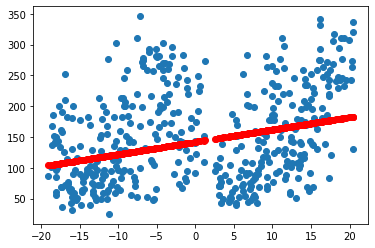

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)
gs.fit(X_comp, y)
predict = gs.predict(X_comp)
plt.scatter(X_comp, predict, color = 'r')

``` kernel = 'poly'```

In [ ]:
model = make_pipeline(StandardScaler(), SVR(kernel = 'poly'))

param_dict = {'svr__C' : [1, 10, 100],
              'svr__epsilon' : [1, 3, 5],
              'svr__degree' : [2,3,4],
              'svr__gamma' : ['auto', 'scale']}


gs = GridSearchCV(model, param_grid = param_dict,
                  cv = ms.KFold(shuffle = True, random_state = 2023), 
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)

print('최적의 파라미터 : {}\n'.format(gs.best_estimator_))
print('최종 테스트 점수 : {}\n'.format(gs.score(X_test, y_test)))
res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 
     'param_svr__degree', 'param_svr__C', 
     'param_svr__epsilon', 'param_svr__gamma']].head(10)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
최적의 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=10, epsilon=5, gamma='auto', kernel='poly'))])

최종 테스트 점수 : 0.36601736598500645



,rank_test_score,mean_test_score,param_svr__degree,param_svr__C,param_svr__epsilon,param_svr__gamma
28,1,0.268203,3,10,5,auto
29,2,0.268203,3,10,5,scale
27,3,0.265292,3,10,3,scale
26,4,0.265292,3,10,3,auto
24,5,0.264505,3,10,1,auto
25,6,0.264505,3,10,1,scale
43,7,0.166851,3,100,1,scale
42,8,0.166851,3,100,1,auto
45,9,0.166706,3,100,3,scale
44,10,0.166706,3,100,3,auto


Fitting 5 folds for each of 54 candidates, totalling 270 fits


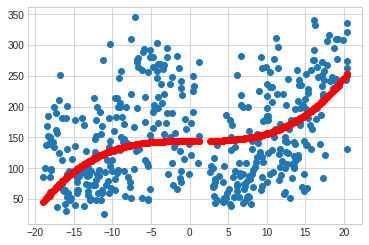

In [ ]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)
gs.fit(X_comp, y)
predict = gs.predict(X_comp)
plt.scatter(X_comp, predict, color = 'r')

```kernel = 'rbf'```


In [ ]:
import sklearn.model_selection as ms

model = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

param_dict = {'svr__C' : [1, 10, 100],
              'svr__epsilon' : [1, 5, 10],
              'svr__gamma' : ['auto', 'scale']}

             

gs = GridSearchCV(model, param_grid = param_dict,
                  cv = ms.KFold(shuffle = True, random_state = 2023), 
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)

print('최종 테스트 점수 : {}\n'.format(gs.score(X_test, y_test)))
print('최적 파라미터 : {}'.format(gs.best_estimator_))

res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 'param_svr__C',
     'param_svr__epsilon', 'param_svr__gamma']].head(10)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
최종 테스트 점수 : 0.4887176192806463

최적 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=10, epsilon=10, gamma='auto'))])


,rank_test_score,mean_test_score,param_svr__C,param_svr__epsilon,param_svr__gamma
10,1,0.390153,10,10,auto
11,2,0.390153,10,10,scale
8,3,0.387371,10,5,auto
9,3,0.387371,10,5,scale
6,5,0.383068,10,1,auto
7,6,0.383068,10,1,scale
14,7,0.335526,100,5,auto
15,8,0.335526,100,5,scale
12,9,0.333112,100,1,auto
13,10,0.333112,100,1,scale


Fitting 5 folds for each of 18 candidates, totalling 90 fits


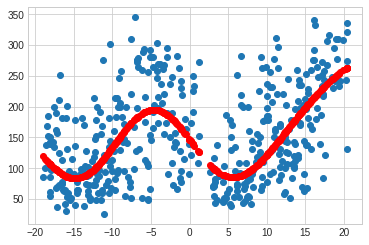

In [ ]:
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y)
gs.fit(X_comp, y)
predict = gs.predict(X_comp)
plt.scatter(X_comp, predict, color = 'r')

## SVC example

### 유방암

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

breast = load_breast_cancer()
X, y = load_breast_cancer(return_X_y = True)
np.unique(y) # binary class

array([0, 1])

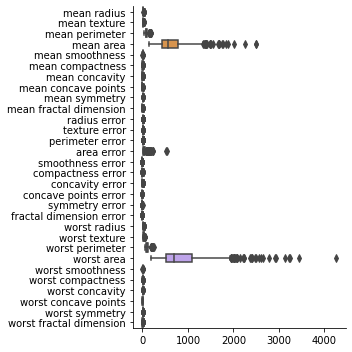

In [ ]:
import seaborn as sns

breast_df = pd.DataFrame(breast.data , columns = breast.feature_names)
sns.catplot(breast_df, orient = 'h', kind = 'box', aspect = 1)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                                    random_state = 2023)

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

make_pipeline(SVC()).get_params().items()

dict_items([('memory', None), ('steps', [('svc', SVC())]), ('verbose', False), ('svc', SVC()), ('svc__C', 1.0), ('svc__break_ties', False), ('svc__cache_size', 200), ('svc__class_weight', None), ('svc__coef0', 0.0), ('svc__decision_function_shape', 'ovr'), ('svc__degree', 3), ('svc__gamma', 'scale'), ('svc__kernel', 'rbf'), ('svc__max_iter', -1), ('svc__probability', False), ('svc__random_state', None), ('svc__shrinking', True), ('svc__tol', 0.001), ('svc__verbose', False)])

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as ms
import multiprocessing

model = make_pipeline(StandardScaler(), SVC())
param_dict = {'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}


gs = GridSearchCV(model, param_grid = param_dict, 
                  cv = ms.KFold(shuffle = True, random_state = 2023),
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)
print('최적의 파라미터 : {}\n'.format(gs.best_estimator_))
print('최종 테스트 점수 : {}\n'.format(gs.score(X_test, y_test)))
res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 'param_svc__kernel']].head(10)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적의 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

최종 테스트 점수 : 0.9736842105263158



,rank_test_score,mean_test_score,param_svc__kernel
2,1,0.971429,rbf
0,2,0.967033,linear
3,3,0.962637,sigmoid
1,4,0.890110,poly


```kernel = 'linear' ```

In [7]:
model = make_pipeline(StandardScaler(),SVC(kernel = 'linear'))

param_dict = {'svc__C' : [0.01, 0.1, 1, 10, 100]}

gs = GridSearchCV(model, param_grid = param_dict,
                  cv = ms.KFold(shuffle = True, random_state = 2023), 
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)

print('최적 파라미터 : {}\n'.format(gs.best_estimator_))
res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
print('최종 테스트 점수 : {}\n'.format(gs.score(X_test, y_test)))
res[['rank_test_score', 'mean_test_score', 'param_svc__C']]

Fitting 5 folds for each of 5 candidates, totalling 25 fits
최적 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear'))])

최종 테스트 점수 : 0.9736842105263158



,rank_test_score,mean_test_score,param_svc__C
1,1,0.973626,0.1
0,2,0.969231,0.01
2,3,0.967033,1
3,4,0.964835,10
4,5,0.958242,100


In [8]:
def make_meshgrid(x, y, h = 0.2):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  return xx, yy

In [9]:
def plot_contours(model, xx, yy, **params):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params) 

  return out 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


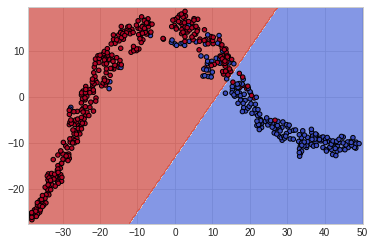

In [11]:
from sklearn.manifold import TSNE

X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx0, xx1 = make_meshgrid(X0, X1)

gs.fit(X_comp, y)
plot_contours(gs, xx0, xx1, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y , cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [18]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx0, xx1 = make_meshgrid(X0, X1)

In [22]:
X_comp[:,1].min()

-26.75177

```kernel = 'rbf'```

In [ ]:
model = make_pipeline(StandardScaler(),SVC(kernel = 'rbf'))

param_dict = {'svc__C' : [0.01, 0.1, 1, 10, 100],
              'svc__gamma' : ['auto', 'scale']}

gs = GridSearchCV(model, param_grid = param_dict,
                  cv = ms.KFold(shuffle = True, random_state = 2023), 
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)

print('최적 파라미터 : {}\n'.format(gs.best_estimator_))
res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
print('최종 테스트 점수 : {}\n'.format(gs.score(X_test, y_test)))
res[['rank_test_score', 'mean_test_score', 'param_svc__C','param_svc__gamma']]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
최적 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma='auto'))])

최종 테스트 점수 : 0.956140350877193



,rank_test_score,mean_test_score,param_svc__C,param_svc__gamma
6,1,0.978022,10,auto
7,1,0.978022,10,scale
4,3,0.971429,1,auto
5,3,0.971429,1,scale
8,5,0.958242,100,auto
9,5,0.958242,100,scale
2,7,0.945055,0.1,auto
3,7,0.945055,0.1,scale
0,9,0.628571,0.01,auto
1,9,0.628571,0.01,scale


Fitting 5 folds for each of 10 candidates, totalling 50 fits


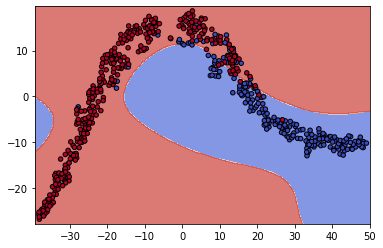

In [ ]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx0, xx1 = make_meshgrid(X0, X1)

gs.fit(X_comp, y)
plot_contours(gs, xx0, xx1, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y , cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

### 붓꽃

In [ ]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y = True)

In [ ]:
np.unique(y) # multi-cate

array([0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 2023)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as ms
import multiprocessing

model = make_pipeline(StandardScaler(), SVC())
param_dict = {'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}


gs = GridSearchCV(model, param_grid = param_dict, 
                  cv = ms.KFold(shuffle = True, random_state = 2023),
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)
print('최적의 파라미터 : {}\n'.format(gs.best_estimator_))
print('최종 테스트 점수 : {}\n'.format(gs.score(X_test, y_test)))
res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 'param_svc__kernel']].head(10)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적의 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

최종 테스트 점수 : 1.0



,rank_test_score,mean_test_score,param_svc__kernel
0,1,0.950000,linear
2,1,0.950000,rbf
3,3,0.908333,sigmoid
1,4,0.883333,poly


Fitting 5 folds for each of 4 candidates, totalling 20 fits


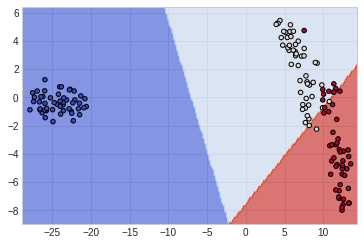

In [ ]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx0, xx1 = make_meshgrid(X0, X1)

gs.fit(X_comp, y)
plot_contours(gs, xx0, xx1, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y , cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

### 와인

In [ ]:
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y = True)

array([0, 1, 2])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 2023)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import sklearn.model_selection as ms
import multiprocessing



model = make_pipeline(StandardScaler(), SVC())
param_dict = {'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}


gs = GridSearchCV(model, param_grid = param_dict, 
                  cv = ms.KFold(shuffle = True, random_state = 2023),
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)
print('최적의 파라미터 : {}\n'.format(gs.best_estimator_))
print('최종 테스트 점수 : {}\n'.format(gs.score(X_test, y_test)))
res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
res[['rank_test_score', 'mean_test_score', 'param_svc__kernel']].head(10)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적의 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear'))])

최종 테스트 점수 : 0.9166666666666666



,rank_test_score,mean_test_score,param_svc__kernel
0,1,0.992857,linear
2,2,0.985714,rbf
3,3,0.971675,sigmoid
1,4,0.929557,poly


``` kernel = 'linear' ```

In [ ]:
model = make_pipeline(StandardScaler(),SVC(kernel = 'linear'))

param_dict = {'svc__C' : [0.01, 0.1, 1, 10, 100]}

gs = GridSearchCV(model, param_grid = param_dict,
                  cv = ms.KFold(shuffle = True, random_state = 2023), 
                  n_jobs = multiprocessing.cpu_count(),
                  verbose = True)

gs.fit(X_train, y_train)

print('최적 파라미터 : {}\n'.format(gs.best_estimator_))
res = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
print('최종 테스트 점수 : {}\n'.format(gs.score(X_test, y_test)))
res[['rank_test_score', 'mean_test_score', 'param_svc__C']]

Fitting 5 folds for each of 5 candidates, totalling 25 fits
최적 파라미터 : Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear'))])

최종 테스트 점수 : 0.9722222222222222



,rank_test_score,mean_test_score,param_svc__C
1,1,0.992857,0.1
2,1,0.992857,1
3,1,0.992857,10
4,1,0.992857,100
0,5,0.985714,0.01


Fitting 5 folds for each of 5 candidates, totalling 25 fits


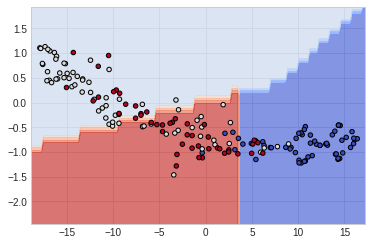

In [ ]:
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:,0], X_comp[:,1]
xx0, xx1 = make_meshgrid(X0, X1)

gs.fit(X_comp, y)
plot_contours(gs, xx0, xx1, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y , cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')
plt.show()